Notebook running through the tutorials on PythonProgramming.net:
Data Visualization
Graph funtionality not the same in Jupyter  as the video

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.plot([1,2,3],[5,7,4])

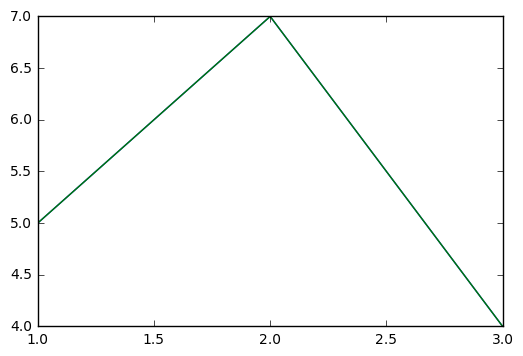

In [5]:
plt.show()

In [6]:
x=[1,2,3]
y=[5,7,4]
x2=[1,2,3]
y2=[10,14,12]

In [7]:
plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')

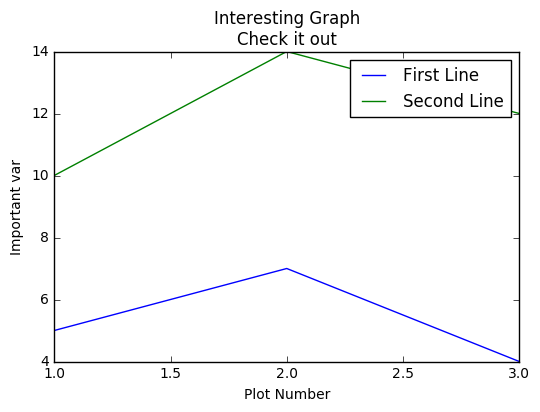

In [8]:
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

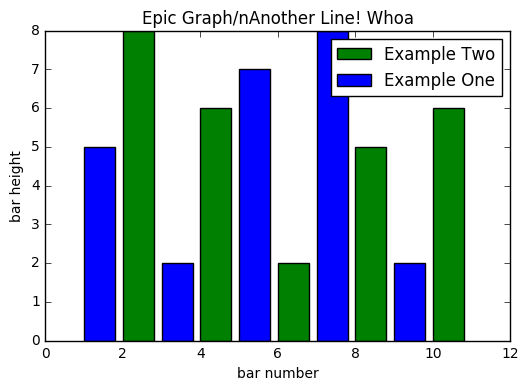

In [12]:
plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example Two", color='g')
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example One")
plt.legend()
plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('Epic Graph/nAnother Line! Whoa')
plt.show()

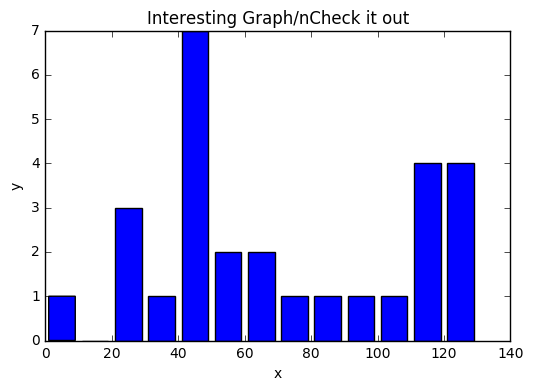

In [14]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages,bins, histtype='bar', rwidth=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph/nCheck it out')
#plt.legend()
plt.show()

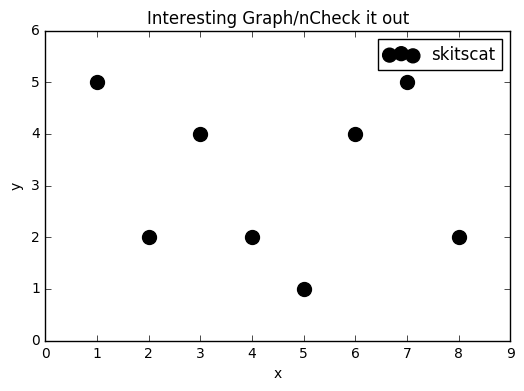

In [18]:
x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]
plt.scatter(x,y,label='skitscat', color='k',marker='o', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph/nCheck it out')
plt.legend()
plt.show()

In [20]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

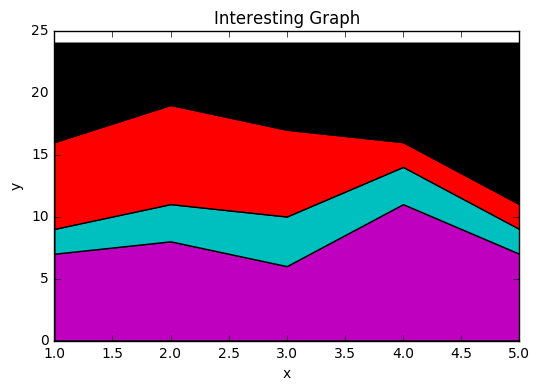

In [22]:
plt.stackplot(days, sleeping, eating, working, playing, colors=['m','c','r','k'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph')
plt.show()

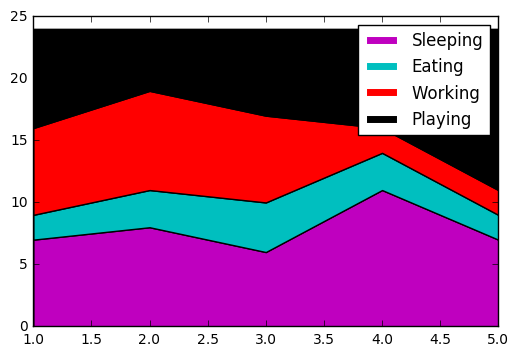

In [25]:
#fake plots as a work around in order to get a legend
plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)
plt.stackplot(days, sleeping, eating, working, playing, colors=['m','c','r','k'])
plt.legend()
plt.show()

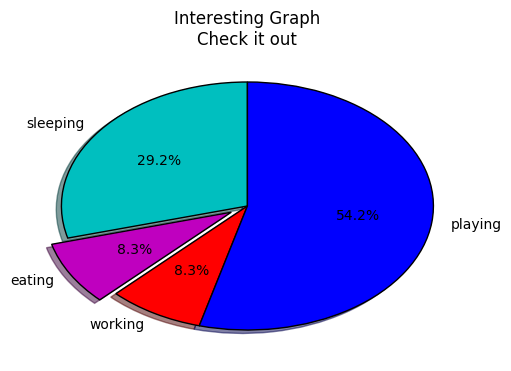

In [27]:
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')

plt.title('Interesting Graph\nCheck it out')
plt.show()

In [39]:
## Can start from here.
import matplotlib.pyplot as plt
import csv

In [52]:
x,y=[], []
with open('example.txt', 'r') as csvfile:
    plots=csv.reader(csvfile,delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        

In [53]:
x, y

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [8, 1, 4, 7, 4, 3, 8, 1, 2, 5])

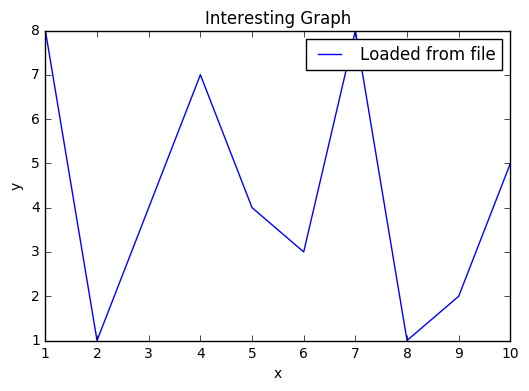

In [54]:
plt.plot(x,y,label='Loaded from file')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph')
plt.legend()
plt.show()

In [50]:
import numpy as np

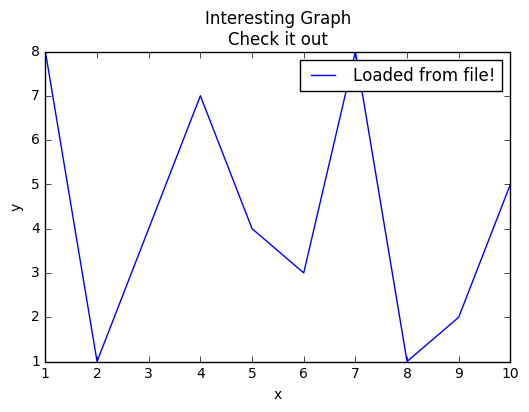

In [51]:
x, y = np.loadtxt('example.txt', delimiter=',', unpack=True)
plt.plot(x,y, label='Loaded from file!')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

In [94]:
#can start here
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates


def bytespdate2num(fmt,encoding='utf-8'):
    strconverter=mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s=b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data(stock):
    
    fig=plt.figure()
    ax1=plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y%m%d')})
    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)    
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    
    plt.show()



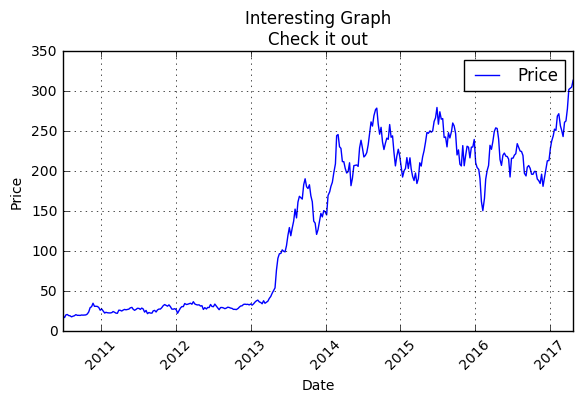

In [95]:
graph_data('TSLA')

In [99]:
#can start here
#Uses datetime since site link altered to 10 days instead of 10 years
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
import datetime as dt
import time

def bytespdate2num(fmt,encoding='utf-8'):
    strconverter=mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s=b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data2(stock):
    
    fig=plt.figure()
    ax1=plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10d/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True)
    
    dateconv = np.vectorize(dt.datetime.fromtimestamp)
    date = dateconv(date)
    
    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)   
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    
    plt.show()

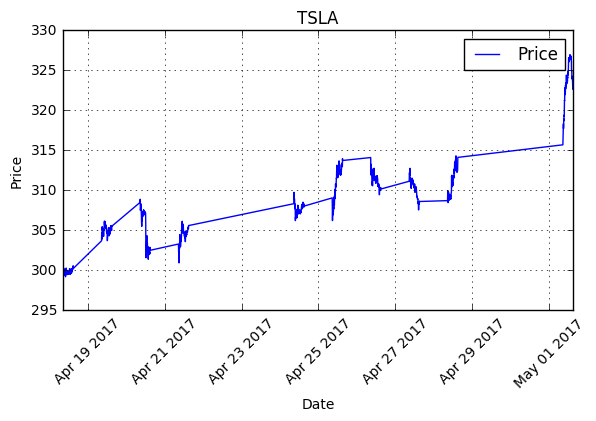

In [100]:
graph_data2('TSLA')

C:\Users\derri\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


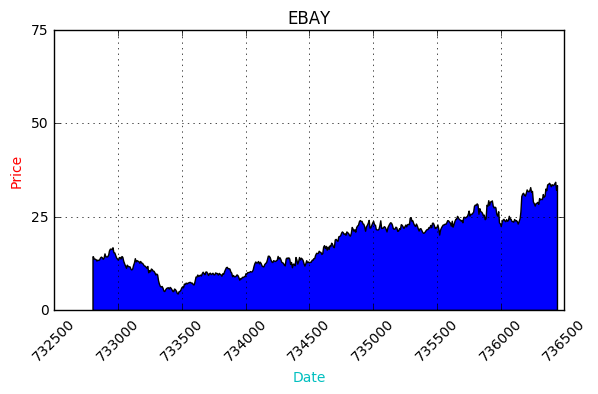

In [101]:
#start here
#back to 10y and filling graph

import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ax1.fill_between(date, 0, closep)

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

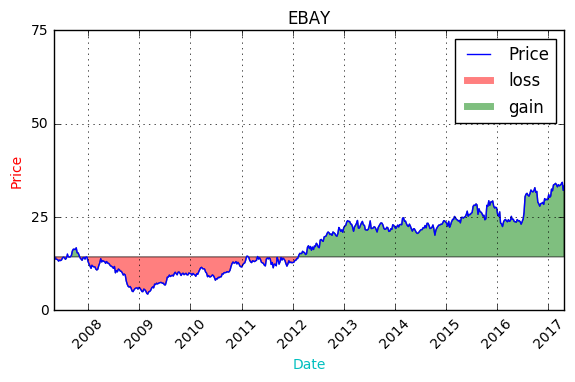

In [102]:
# this changes it to gain/loss

import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ax1.plot_date(date, closep,'-', label='Price')

    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)

    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

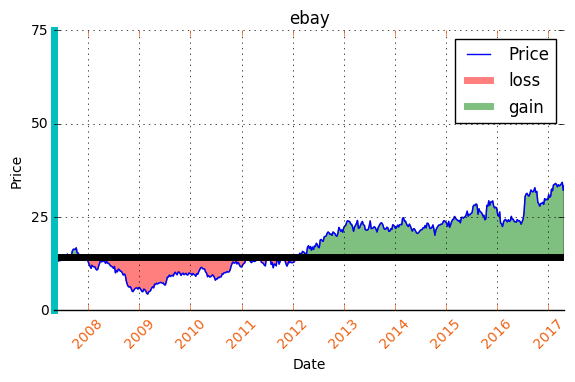

In [104]:
#Spines and horizontal lines
import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)
    ax1.axhline(closep[0], color='k', linewidth=5)
    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
    #ax1.xaxis.label.set_color('c')
    #ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])

    ax1.spines['left'].set_color('c')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_linewidth(5)

    ax1.tick_params(axis='x', colors='#f06215')

    
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('ebay')

C:\Users\derri\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


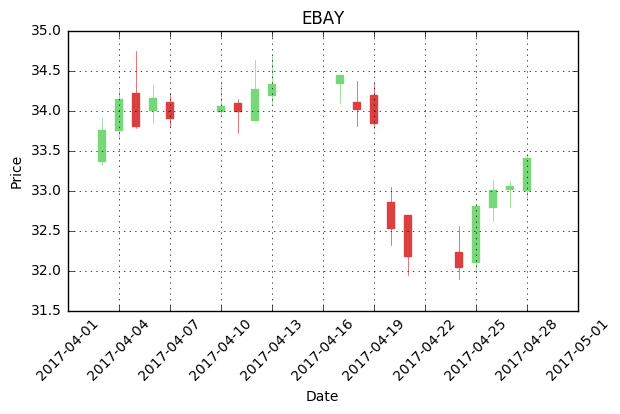

In [105]:
#candlestick plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')


C:\Users\derri\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


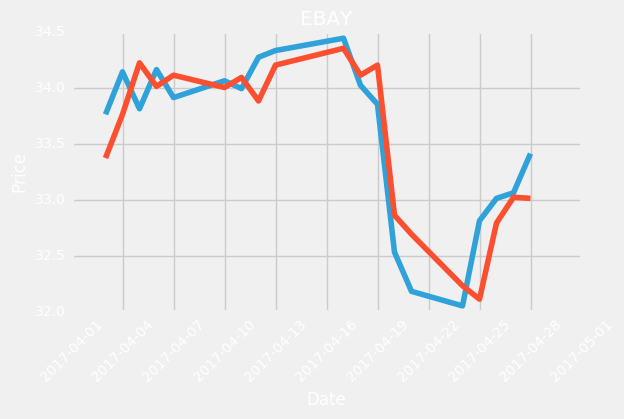

In [126]:
#styles
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style



import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    #candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax1.plot(date,closep)
    ax1.plot(date,openp)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    style.use('ggplot')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
    

graph_data('EBAY')


C:\Users\derri\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


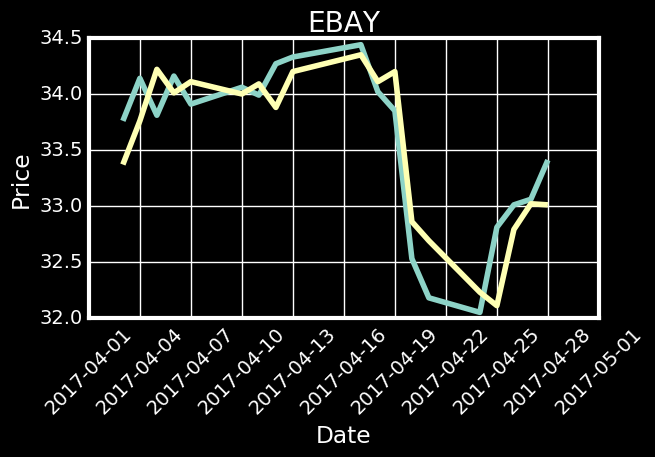

In [117]:
graph_data('EBAY', 'dark_background')

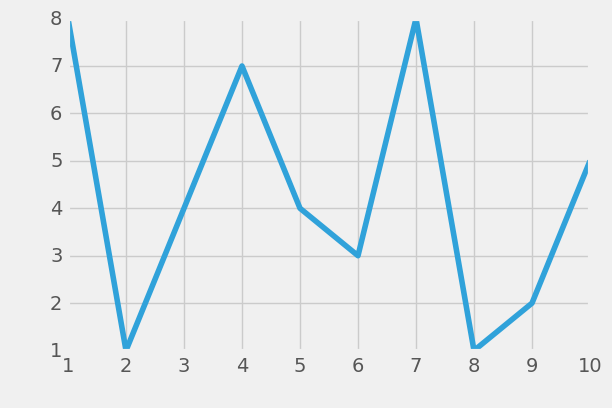

In [152]:
#Live graphs - doesn't seem to work in Jupyter Notbook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
#testing something
from matplotlib import rc, animation
###

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs, ys)

#found rc as a potential fix..nope    
#rc('animation', html='html5')
ani=animation.FuncAnimation(fig, animate, interval=1000)
plt.show()


['seaborn-darkgrid', 'seaborn-deep', 'seaborn-dark', 'dark_background', 'seaborn-poster', 'seaborn-dark-palette', 'ggplot', 'seaborn-white', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-whitegrid', 'fivethirtyeight', 'seaborn-talk', 'bmh', 'seaborn-pastel', 'seaborn-paper', 'grayscale', 'seaborn-muted', 'classic', 'seaborn-bright', 'seaborn-colorblind']
C:\Users\derri\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py


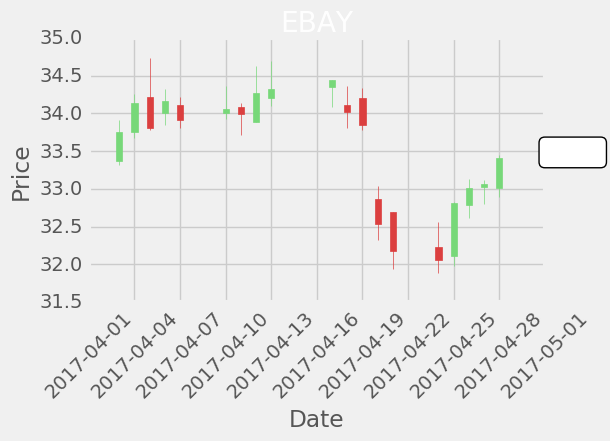

In [153]:
#annotating the graph - the annotation box shows up but value not printed in box..
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+3, closep[-1]), bbox=bbox_props)

    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.87, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

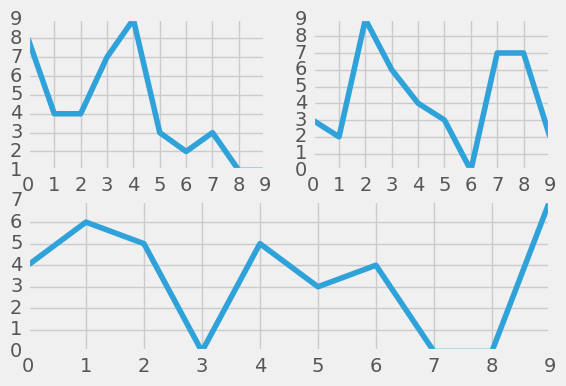

In [158]:
#subplots
import random
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()

def create_plots():
    xs = []
    ys = []

    for i in range(10):
        x = i
        y = random.randrange(10)

        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

x,y=create_plots()
ax1.plot(x,y)


x,y=create_plots()
ax2.plot(x,y)

x,y=create_plots()
ax3.plot(x,y)


plt.show()

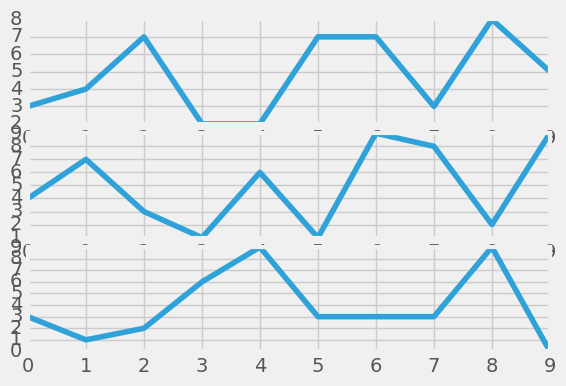

In [161]:
#subplot to grid - easier to set up
import random
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()

def create_plots():
    xs = []
    ys = []

    for i in range(10):
        x = i
        y = random.randrange(10)

        xs.append(x)
        ys.append(y)
    return xs, ys

ax1=plt.subplot2grid((6,1), (0,0), rowspan=2, colspan=1)
ax2=plt.subplot2grid((6,1), (2,0), rowspan=2, colspan=1)
ax3=plt.subplot2grid((6,1), (4,0), rowspan=2, colspan=1)

x,y=create_plots()
ax1.plot(x,y)


x,y=create_plots()
ax2.plot(x,y)

x,y=create_plots()
ax3.plot(x,y)


plt.show()

In [ ]:
### Jumping ahead
### Basemap Geographic requires python 3.3..no updates for newer python versions

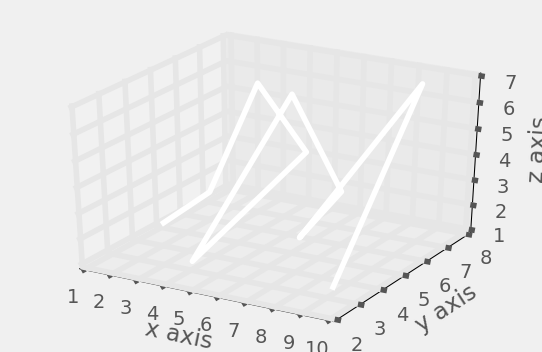

In [169]:
#3d plotting mathplotlib
#Jupyter not allowing to move and not using style...

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

ax1.plot_wireframe(x,y,z)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

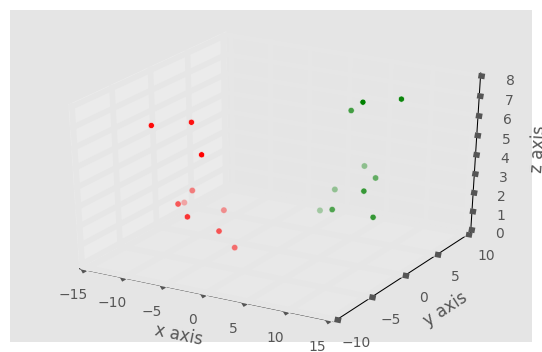

In [170]:
#3d scatter
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

x2 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y2 = [-5,-6,-7,-8,-2,-5,-6,-3,-7,-2]
z2 = [1,2,6,3,2,7,3,3,7,2]

ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

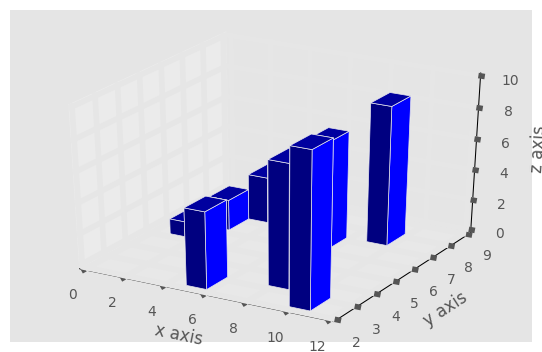

In [171]:
#3d bar chart
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()